## 1-Exploring data with Pandas - Part 1
Pandas is an exceptional tool for working with tabular data. Here we review the basics of what a dataframe is, how we get data into a dataframe, and how we can explore those data when in a dataframe format.
### Topics
1. [Basic form of a dataframe](#1.-The-DataFrame)
* [Loading data into a dataframe](#2.-Loading-data-into-a-dataframe)
* [Viewing and inspecting data properties](#3.-Viewing-and-inspecting-data-properties)
* [Selecting columns](#4.-Selecting-columns)
* [Descriptive statistics](#5.-Descriptive-Statistics)
* [Some basic plots](#6.-Some-Basic-Plots)

In [2]:
#Import the pandas package, conventially imported as "pd"
import pandas as pd

## 1. The DataFrame
We'll begin by exploring the key elements of the DataFrame object. Some notions are self evident, i.e., data are stored in rows and columns, much like a spreadsheet. Others are more nuanced: implicit and explicit indices, tables vs. views, and some others.

Let's begin examining the components of DataFrames by examining two ways they can be created.  

#### DataFrame as a list of lists
First, a DataFrame can be considered as a list of lists. Below we see an example where we have 4 sub-lists, each containing 3 items (e.g. the first list [`'Joe'`,`22`,& `True`]). Each of these 4 sub-lists comprises a _row_ in the resulting DataFrame, and each item in a given list becomes a _column_. 

In [3]:
#Creating a simple data frame as a list of lists
df = pd.DataFrame([['Joe',22,True],
                   ['Bob',25,False],
                   ['Sue',28,False],
                   ['Ken',24,True]],
                  index = [10,20,40,30],
                  columns = ['Name','Age','IsStudent']
                 )
#Reveal the type of object created
type(df)

pandas.core.frame.DataFrame

In [4]:
#Display the resulting data frame
df

,Name,Age,IsStudent
10,Joe,22,True
20,Bob,25,False
40,Sue,28,False
30,Ken,24,True


A few key points here: 
* First is that each of the sub-lists has the same number of elements (3) and the same data types as the other sub-lists. Otherwise we'd end up with missing data or "coerced" data types.
* Second is that we also explicitly specify and **index** for the rows (`index = [1,2,3,4]`). The index allows us to identify a specific row.
* Likewise, we explicitly set column names with `columns = ['Name','Age','IsStudent']`, and yes, these allow us to indentify specific columns in our DataFrame.

#### Data frame as a collection of dictionaries
Another way to build (and think of) a DataFrame as a set of dictionaries where each dictionary is a column of data, with the dictionary's key being the column name and it's value being a list of values:

In [5]:
#Creating a data frame as dictionaries of lists
df = pd.DataFrame({"Name":['Joe','Bob','Sue','Ken'],
                   "Age":[22,25,28,24],
                   "IsStudent":[True,False,False,True]},
                  index = [10,20,40,30]
                 )
df

,Name,Age,IsStudent
10,Joe,22,True
20,Bob,25,False
40,Sue,28,False
30,Ken,24,True


### Meh, so what...
What does this reveal? List of lists vs set of dictionaries? Well, it explains how you can extract elements from the DataFrame. **Thinking of a DataFrame as a list of lists**, getting the value of the 2nd column, 3rd row is equivalent of getting data from the 2nd item in the 3rd list.  

We can get that value using the DataFrame's `iloc` function (short for intrinsic location), passing the row and column of the location we want.

In [6]:
#Get the 2nd item from the 3rd row; recalling Python is zero-based
df.iloc[2,1]

28

And if we hop over to **thinking a DataFrame as a set of dictionaries**, we can target a specific value by specifying the index of the value (row) from the dictionary column) we want. The row however, is referred to by the index *we* assigned, not it's implicit index generated by the order in which it was entered. 

In [7]:
#Get the value in the 'Name' column corresponding to the row with an index of '20'
df['Name'][20]

'Bob'

We can also to quick math on our data. If we wanted to calculate the age of our students in days:

In [8]:
df['Age_days'] = df['Age'] * 365
df

,Name,Age,IsStudent,Age_days
10,Joe,22,True,8030
20,Bob,25,False,9125
40,Sue,28,False,10220
30,Ken,24,True,8760


_We'll return to how we extract data from a DataFrame, but for now just soak in the fact that values in a DataFrame can be referenced by their implicit location (i.e. their row, column coordinates) and by their explicit column name and row index._

---
## 2. Loading data into a dataframe
More than likely we'll be reading in data vs entering it manually, so let's review how files are read into a Pandas Dataframe. Pandas can read many other formats: Excel files, HTML tables, JSON, etc. But let's concentrate on the simplest one - the csv file - and discuss the key parameters involved. 

In the Data folder within our workspace is a file named `surveys.csv` which holds the data we'll use. If you're curious, this dataset is part of the Portal Teaching data, a subset of the data from Ernst et al [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm).

The dataset is stored as a `.csv` file: each row holds information for a single animal, and the columns represent:

| Column | Description |
| :--- | :--- |
|record_id |	Unique id for the observation |
|month| 	month of observation |
|day |	day of observation |
|year |	year of observation |
|plot_id |	ID of a particular plot |
|species_id |	2-letter code |
|sex |	sex of animal (“M”, “F”) |
|hindfoot_length |	length of the hindfoot in mm |
|weight |	weight of the animal in grams |

Below, we read in this file, saving the contents to the variabel `surveys_df`

In [15]:
#Read in the surveys.csv file
surveys_df = pd.read_csv('../data/surveys.csv')

In [10]:
#View the dataframe just by typing the variable name
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


Pandas can read data stored in many different formats. CSV is one of the more common ones, but it can also handle txt, JSON, HTML, MS Excel, HDF5, Stata, SAS, and certain SQL formats. Each has it's own `read_()` function and is fully documented. 

* Run the following to get documentation for the `read_csv()` function:

In [12]:
#Display help on the read_csv() function
pd.read_csv?

Full documentation can be found simply via a web search on "[pandas read_csv](https://www.google.com/search?q=read_csv)".

>Note all the options available to read in a simple CSV file. Think back to some of the other files we've read into Python using its file object. How might the following options have helped? 
* `delimeter` or `sep` to read in tab delimeted files...
* `comment` to skip metadata rows...
* `skiprows` to skip metadata rows...

I've never used many of these modifiers, but it's important to know they exist and how they are implemented. I often use a bit of trial and error when first applying them. 

#### Using the `dtype` modifier 
One important modifier that is easy to overlook is the `dtype` one. This modifier allows us to override the default data type that Pandas assignes to a column when it's imported into a dataframe. 

Note that in our `surveys_df` dataframe, we have two numeric columns that contain _nominal_ data: `record_id` and `plot_id`. It's possible these numeric labels may have leading zeros. (Think ZIP codes or HUC codes...). As such, we'd want to be sure to import these values as _strings_, not _integers_ as Pandas would do by default. 

We do this using the `dtype` modifier, passing a dictionary of column name:format for each variable we want to ensure is imported under our control:

In [4]:
#Read in the surveys.csv file
surveys_df = pd.read_csv(
    '../data/surveys.csv',
    dtype={'record_id':'str','plot_id':'str'})
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [18]:
surveys_df.dtypes

record_id           object
month                int64
day                  int64
year                 int64
plot_id             object
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

---
## 3. Viewing and inspecting data properties
We've already seen that typing in the dataframe's variable name will display a nicely formatted snapshot of the data, truncated if the dataframe is too big. 

### Viewing data with `head()`, `tail()`, and `sample()`
Some handy commands to show snippets of our dataframe are `head()`, `tail()`, and `sample()`. We can pass in a number as the argument to each of these to display a set number of records from our dataset. (`head()` and `tail()` default to 5.)

In [19]:
#Use the head() command to view the first 5 rows of the dataframe
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


► What do you think the sample function does? What about sample? How might you find out?

In [20]:
#Try out the tail command
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [27]:
#Try out the sample command (you need to specifiy number of records)
surveys_df.sample(5)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2386,2387,1,16,1980,14,OL,NaN,NaN,NaN
3187,3188,8,13,1980,17,DM,M,36.0,46.0
32389,32390,8,25,2001,2,OT,F,21.0,23.0
11689,11690,7,4,1986,11,DO,F,34.0,29.0
30455,30456,3,4,2000,19,PB,F,25.0,24.0


### Inpsecting our dataframe's properties
Here, we'll create a second dataframe by reading in a dataset stored online. And then we'll apply the following commands to explore properties of this dataset:
* Revealing size attributes with `len()`, `shape`, and `size`
* Revealing columns included with `columns`
* Revealing the index with `index`
* Revealing the dataframe's data types with `dtypes` and `info()`

In [3]:
#Read in HUC12 land cover data from EPA's EnviroAtlas dataset
data_url = 'https://github.com/ENV859/EnviroAtlasData/blob/main/LandCover.csv?raw=true'
land_df = pd.read_csv(data_url)
land_df.head()
land_df.tail()

,HUC_12,N_INDEX,PFOR,PWETL,PDEV,PAGT,PAGP,PAGC,PFOR90,PWETL95
82910,181002041305,85.044899,0.000000,0.003772,14.94830,0.006790,0.000000,0.00679,0.000000,0.003772
82911,181002041306,93.744400,0.000000,0.031699,4.96682,1.288760,0.063398,1.22239,0.006934,0.024765
82912,181002041307,81.957397,0.004124,0.116303,2.00107,16.041599,0.004949,15.22330,0.066812,0.053615
82913,181002041308,42.458599,0.002431,0.114263,4.76017,52.781200,2.597670,48.32370,0.082659,0.034036
82914,181002041400,91.111000,0.018853,6.950290,1.66531,7.223650,3.541130,3.37460,0.144536,6.824610


In [29]:
#Pass our dataframe into the len() function
len(land_df)

82915

In [30]:
#Reveal the shape of the dataframe
land_df.shape

(82915, 10)

In [31]:
#Reveal the size of the dataframe
land_df.size

829150

► Can you deduce what properties the `len()`, `shape`, and `size` reveal? 
* How many rows does the dataframe have?
* How many columns?
* How many total values are in this table? 

In [32]:
#Show a list of columns in the dataframe
land_df.columns.values

array(['HUC_12', 'N_INDEX', 'PFOR', 'PWETL', 'PDEV', 'PAGT', 'PAGP',
       'PAGC', 'PFOR90', 'PWETL95'], dtype=object)

In [33]:
#Show the dataframe's index
land_df.index

RangeIndex(start=0, stop=82915, step=1)

In [34]:
#Show the data types of each column 
land_df.dtypes

HUC_12       int64
N_INDEX    float64
PFOR       float64
PWETL      float64
PDEV       float64
PAGT       float64
PAGP       float64
PAGC       float64
PFOR90     float64
PWETL95    float64
dtype: object

In [35]:
#Show more information on the dataframe and on each column
land_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82915 entries, 0 to 82914
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HUC_12   82915 non-null  int64  
 1   N_INDEX  82915 non-null  float64
 2   PFOR     82915 non-null  float64
 3   PWETL    82915 non-null  float64
 4   PDEV     82915 non-null  float64
 5   PAGT     82915 non-null  float64
 6   PAGP     82915 non-null  float64
 7   PAGC     82915 non-null  float64
 8   PFOR90   82915 non-null  float64
 9   PWETL95  82915 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 6.3 MB


---
## Check your understanding:
1. Using the commands describe above, answer the following questions regarding the **surveys_df** dataframe.
 1. How many records (rows) are in the dataset?
 * How many columns are in the dataset?
 * What are the column names?
 * What data type do the columns use?
 * How many total values are stored in this dataframe?
 * What are the indices used in this dataframe?
 * How many non-null values are found in the 'WEIGHT column  

In [5]:
# How many records (rows) are in the dataset?
len(surveys_df)

35549

In [8]:
# How many columns are in the dataset?
surveys_df.shape[1]

9

In [10]:
# What are the column names?
surveys_df.columns.values

array(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id',
       'sex', 'hindfoot_length', 'weight'], dtype=object)

In [13]:
# What data type do the columns use?
surveys_df.dtypes

record_id           object
month                int64
day                  int64
year                 int64
plot_id             object
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [14]:
# How many total values are stored in this dataframe?
surveys_df.size

319941

In [15]:
# What are the indices used in this dataframe?
surveys_df.index

RangeIndex(start=0, stop=35549, step=1)

In [19]:
# How many non-null values are found in the 'WEIGHT column
surveys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        35549 non-null  object 
 1   month            35549 non-null  int64  
 2   day              35549 non-null  int64  
 3   year             35549 non-null  int64  
 4   plot_id          35549 non-null  object 
 5   species_id       34786 non-null  object 
 6   sex              33038 non-null  object 
 7   hindfoot_length  31438 non-null  float64
 8   weight           32283 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 2.4+ MB


2. Re-read EnviroAtlas data into the **land_df** dataframe, but this time ensure the `HUC_12` column is read as a **string**, not as an **integer (int64)**.
 * Ensure that the data type of the column was read in as an "object" (i.e. a string) not "int64".

In [23]:
# Re-read EnviroAtlas data into the land_df dataframe, ensuring HUC_12 is a string
data_url = 'https://github.com/ENV859/EnviroAtlasData/blob/main/LandCover.csv?raw=true'
land_df = pd.read_csv(data_url, dtype={'HUC_12':'str'}) #<-- Modify this line

In [24]:
# Ensure that the data type of the column was read in as an "object" (i.e. a string) not "int64"
land_df.dtypes

HUC_12      object
N_INDEX    float64
PFOR       float64
PWETL      float64
PDEV       float64
PAGT       float64
PAGP       float64
PAGC       float64
PFOR90     float64
PWETL95    float64
dtype: object

---
## 4. Selecting columns
We can select specific columns based on the column names. The basic syntax is dataframe[column name], where value can be a single column name, or a _list_ of column names. Let’s start by selecting two columns from our `surveys_df` dataframe, `species_id` and `hindfoot_length`:

In [25]:
#Subset just the two columns from the full dataframe
selection = surveys_df[['species_id','hindfoot_length']]
selection.head()

,species_id,hindfoot_length
0,NL,32.0
1,NL,33.0
2,DM,37.0
3,DM,36.0
4,DM,35.0


In [26]:
#Reveal what is returned - it's a dataframe
type(selection)

pandas.core.frame.DataFrame

In [27]:
#Reveal the shape of the new dataframe
selection.shape

(35549, 2)

**Note**: if we select just one column, the obejct returns is a **series**, not a dataframe. 
>A **series** is simply one column of data. However, it has a different set of properties and methods. 

In [28]:
one_col = surveys_df['hindfoot_length']
one_col.head()

0    32.0
1    33.0
2    37.0
3    36.0
4    35.0
Name: hindfoot_length, dtype: float64

In [29]:
type(one_col)

pandas.core.series.Series

>**NOTE**: You can also retreive a column using a different syntax:
```python
surveys_df.hindfoot_length
```
This syntax works only if the column name is a valid name for a Python variable (e.g. the column name should not contain whitespace). The syntax data["column"] works for all kinds of column names, so we recommend using this approach. Also, things may get ugly if you have a column name that conflicts with a property of your dataframe. For example, what if your column name was "`shape`"??

## 5. Descriptive Statistics
Pandas DataFrames and Series contain useful methods for getting summary statistics. Available methods include `mean()`, `median()`, `min()`, `max()`, and `std()` (the standard deviation).

We could, for example, check the mean hindfoot length in our input data. We check the mean for a single column (Series):

In [30]:
#Compute the mean hindfoot length
surveys_df['hindfoot_length'].mean()

29.287931802277498

Try computing some other summary stats for either of our two numeric columns (`hindfoot_lenght` or `weight`) using the statements mentioned above. 

In [32]:
# Compute the count of weight records
surveys_df['weight'].count()

32283

In [33]:
# Compute the standard deviation of weights
surveys_df['weight'].std()

36.63125947458358

In [34]:
# Compute the median weight
surveys_df['weight'].median()

37.0

In [35]:
# What were the first and last years of the survey
first_year = surveys_df['year'].min()
last_year = surveys_df['year'].max()
print(f"The study spanned fro {first_year} to {last_year}")

The study spanned fro 1977 to 2002


A few more complex ones are **quantiles** and **correlations**:

→ First, percentiles using the `quantiles()` function, where we pass in the percent to compute:

In [36]:
#Compute a the 25th percentile of weight
surveys_df['weight'].quantile(0.25)

20.0

In [37]:
#Change the above to compute the 50th percentile; does it equal the median?
surveys_df['weight'].median() == surveys_df['weight'].quantile(0.5)

True

→ Now to compute **variable pairwise coorelations**. Here we'll use the HUC12 land cover data and display pairwise correlation values among its variables (using the default Pearson method as a table

In [38]:
#Create a pairwise correlation table among variables in the land_df dataframe
land_df.corr()

,N_INDEX,PFOR,PWETL,PDEV,PAGT,PAGP,PAGC,PFOR90,PWETL95
N_INDEX,1.000000,0.367794,0.044720,-0.399696,-0.934791,-0.411476,-0.859017,0.360184,0.021626
PFOR,0.367794,1.000000,-0.017961,-0.065782,-0.374507,0.024981,-0.422649,0.952044,-0.088220
PWETL,0.044720,-0.017961,1.000000,0.049588,-0.066947,-0.025664,-0.063482,0.254574,0.639401
PDEV,-0.399696,-0.065782,0.049588,1.000000,0.055561,0.075756,0.029833,-0.046137,0.018546
PAGT,-0.934791,-0.374507,-0.066947,0.055561,1.000000,0.421073,0.926845,-0.373567,-0.030295
PAGP,-0.411476,0.024981,-0.025664,0.075756,0.421073,1.000000,0.049823,0.018213,-0.025271
PAGC,-0.859017,-0.422649,-0.063482,0.029833,0.926845,0.049823,1.000000,-0.418931,-0.023100
PFOR90,0.360184,0.952044,0.254574,-0.046137,-0.373567,0.018213,-0.418931,1.000000,-0.018254
PWETL95,0.021626,-0.088220,0.639401,0.018546,-0.030295,-0.025271,-0.023100,-0.018254,1.000000


**TIP**: Using visualization tricks that we'll touch on later, we can style our table, making it much more informative...

In [39]:
#Save the correlation table to a variable
coorelation_table = land_df.corr()
#Show the table, with styling
coorelation_table.style.background_gradient(cmap = 'YlGnBu')

,N_INDEX,PFOR,PWETL,PDEV,PAGT,PAGP,PAGC,PFOR90,PWETL95
N_INDEX,1.000000,0.367794,0.044720,-0.399696,-0.934791,-0.411476,-0.859017,0.360184,0.021626
PFOR,0.367794,1.000000,-0.017961,-0.065782,-0.374507,0.024981,-0.422649,0.952044,-0.088220
PWETL,0.044720,-0.017961,1.000000,0.049588,-0.066947,-0.025664,-0.063482,0.254574,0.639401
PDEV,-0.399696,-0.065782,0.049588,1.000000,0.055561,0.075756,0.029833,-0.046137,0.018546
PAGT,-0.934791,-0.374507,-0.066947,0.055561,1.000000,0.421073,0.926845,-0.373567,-0.030295
PAGP,-0.411476,0.024981,-0.025664,0.075756,0.421073,1.000000,0.049823,0.018213,-0.025271
PAGC,-0.859017,-0.422649,-0.063482,0.029833,0.926845,0.049823,1.000000,-0.418931,-0.023100
PFOR90,0.360184,0.952044,0.254574,-0.046137,-0.373567,0.018213,-0.418931,1.000000,-0.018254
PWETL95,0.021626,-0.088220,0.639401,0.018546,-0.030295,-0.025271,-0.023100,-0.018254,1.000000


Pandas also as a `describe()` function that quickly generates descriptive stats for all numeric variables in your dataset.

In [40]:
#Generate summary stats on all numeric columns in the data
land_df.describe()

,N_INDEX,PFOR,PWETL,PDEV,PAGT,PAGP,PAGC,PFOR90,PWETL95
count,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000,82915.000000
mean,68.777414,27.484744,5.232636,6.084254,25.087678,7.121142,17.957483,31.497063,1.220317
std,32.283685,28.995366,11.965099,11.286652,29.594349,11.119958,26.865132,30.754076,5.653916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.397900,0.672056,0.046830,0.764582,0.314477,0.041610,0.031159,1.626115,0.000000
50%,81.367104,16.115200,0.614392,3.535070,10.843900,1.968300,2.143200,21.746500,0.059898
75%,98.036251,51.235849,4.096310,6.002915,44.822300,9.737880,28.241400,58.712151,0.528598
max,100.000000,100.000000,100.000000,100.000000,100.000000,98.775803,100.000000,100.000000,100.000000


#### Categorical data
Descriptive statistics are useful for numeric data. For categorical data, we have other means for summarizing data:
* `nunique()`: lists the number of unique values in each column of a dataframe (or in a series)
* `unique()` : lists the unique values occuring in the supplied series
* `value_counts()` : lists the number of records associated with each unique value

_→In exploring these, consider the type of object they return and what you can do with that object..._

In [41]:
#Reveal how many unique values in each field in the surveys_df dataframe
surveys_df.nunique()

record_id          35549
month                 12
day                   31
year                  26
plot_id               24
species_id            48
sex                    2
hindfoot_length       56
weight               255
dtype: int64

In [42]:
#Reveal how many unique values occur just in the 'species_id' series
surveys_df['species_id'].nunique()

48

In [43]:
#List the unique values in the species_id field
surveys_df['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [44]:
#List how many records are associated with each unique month record
surveys_df['month'].value_counts()

7     3633
4     3443
3     3390
5     3073
10    3064
11    3016
12    2799
2     2796
9     2751
6     2697
1     2518
8     2369
Name: month, dtype: int64

---
### <font color='red'>*Challenge* - Counts and Lists from Data </font>


1. Create a list of unique **plot ID**’s found in the surveys data (much like we did above with the species id values). Call it `plot_names`. How many unique plots are there in the data? How many unique species are in the data?

1. What is the difference between `len(plot_names)` and `surveys_df['plot_id'].nunique()`?


In [59]:
# Challenge 1
plot_names = surveys_df['plot_id'].unique()
len(plot_names)
len(surveys_df['species_id'].unique())

49

In [62]:
# Challenge 2
type(surveys_df['plot_id'].nunique())
type(plot_names)

numpy.ndarray

## 6. Some Basic Plots
We'll revist visualizations, but as a teaser here are some quick and easy plots of our data. 

* First a histogram of all the `PFOR` (percent forest) values from the EnviroAtlas data. 

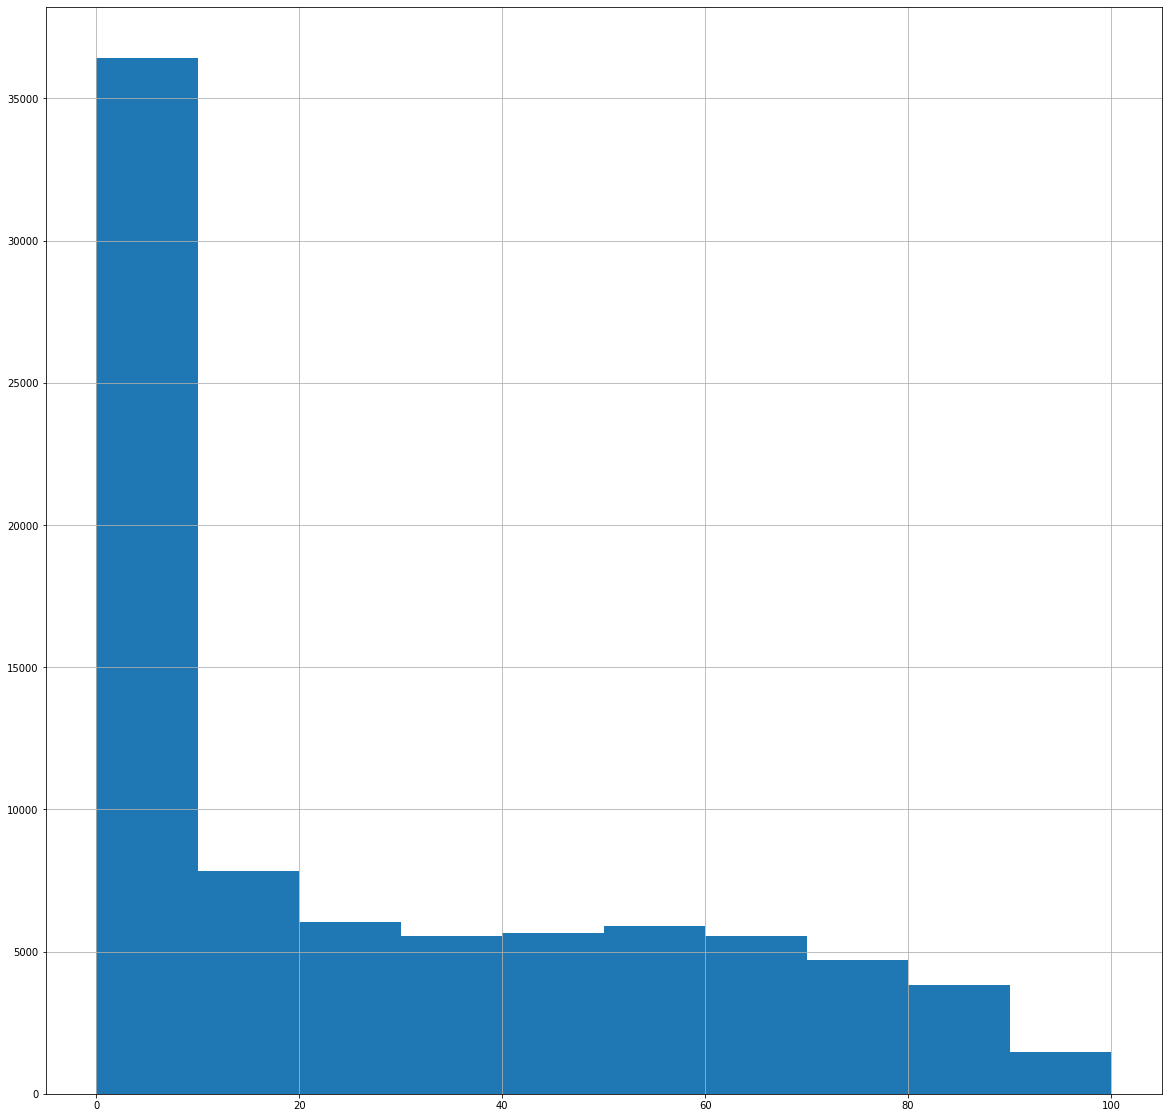

In [65]:
# Create a histogram of values in the PFOR column, in 10 bins
land_df['PFOR'].hist(bins=10,figsize=(20,20));

* And now, we'll generate histograms for each month of the `weight` values in the `surveys_df` dataframe. We'll also increase the size of the figure to 20 x 20 units.

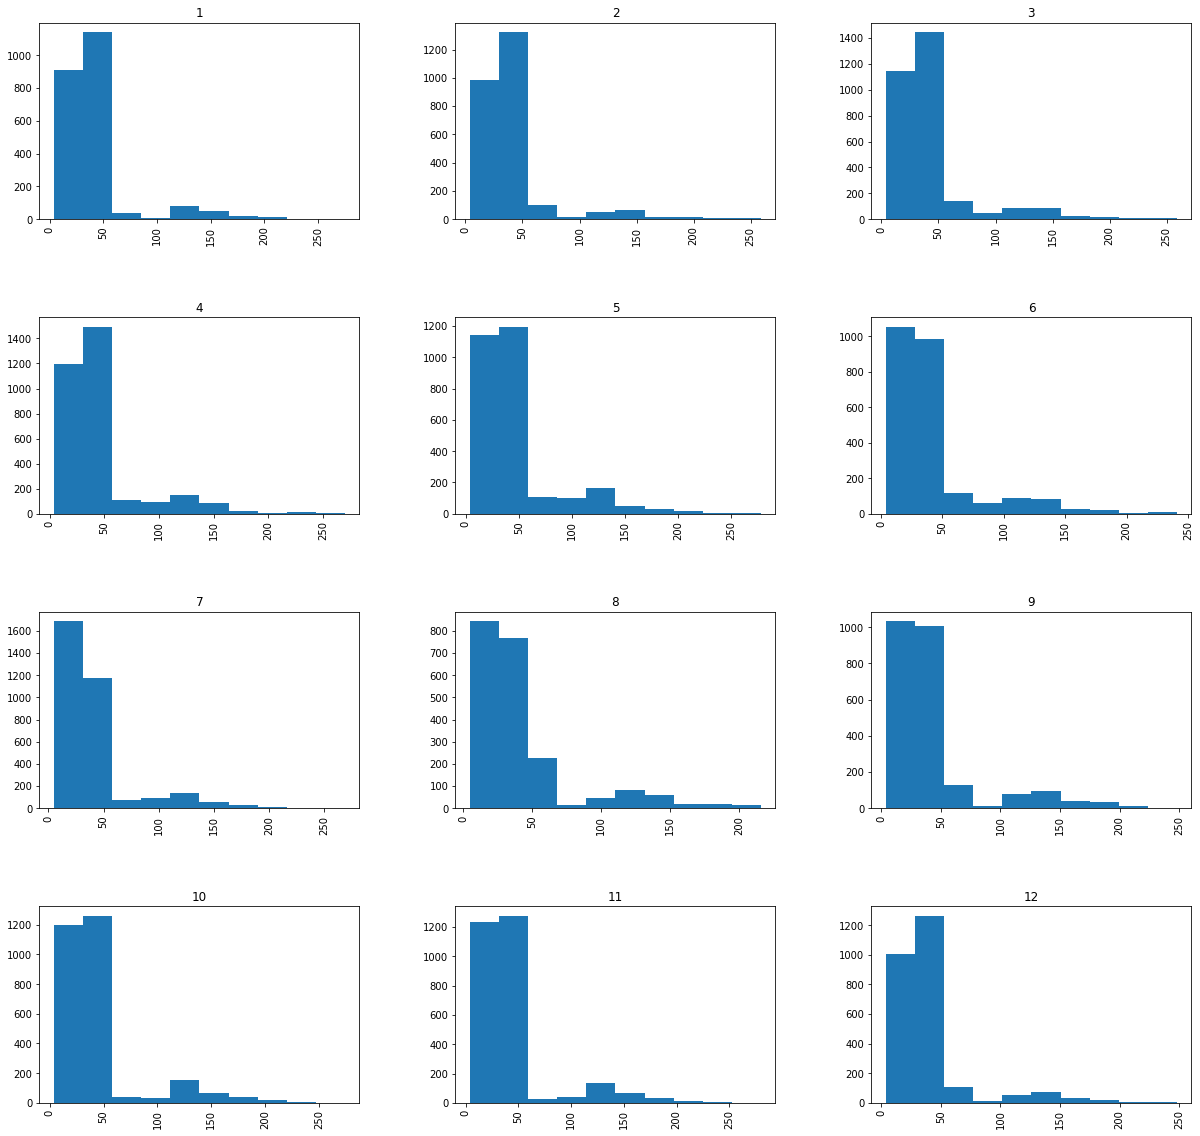

In [64]:
#Plot distributions of weights by month
surveys_df.hist(column='weight',by='month',figsize=(20,20));

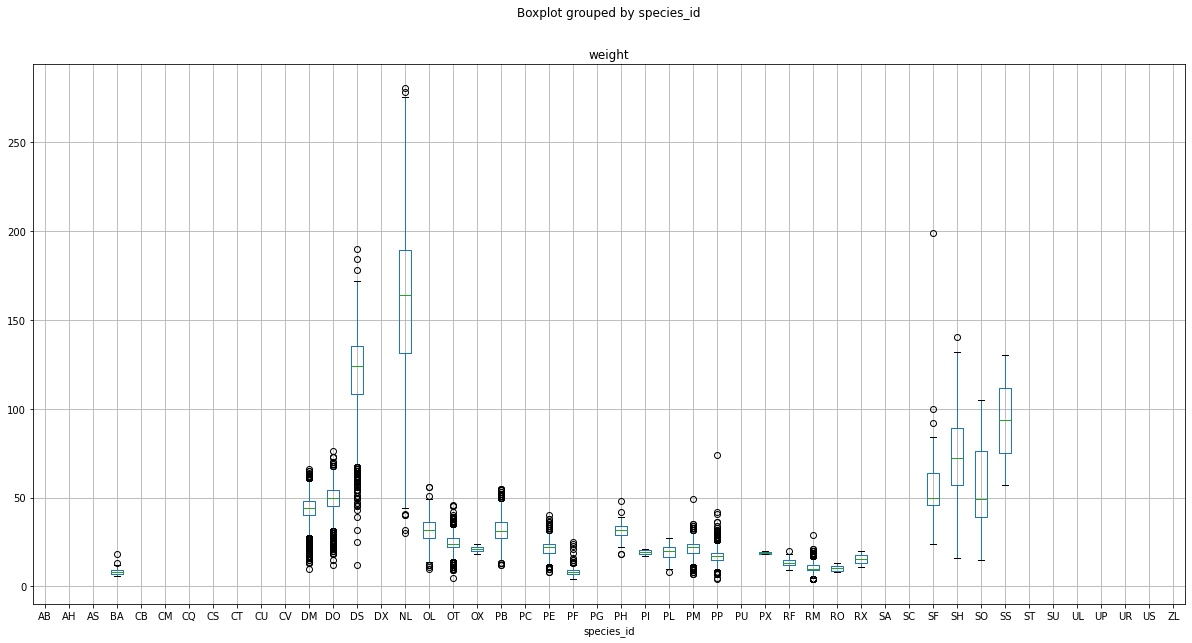

In [66]:
#And finally box plots by month
surveys_df.boxplot(column='weight',by='species_id',figsize=(20,10));

## Summary
While this is a very quick introduction to the Pandas dataframe and series objects, I'm hopeful that you now have an appreciation for the utility of structuring data into a dataframe has -- and now have some command on how to generate and explore dataframes using the Pandas package. 

Actions you should now be capable of include:
* Creating a dataframe from a lists of lists (of equal sizes)
* Creating a dataframe from a set of dictionairies (of equal lengths)
* Reading data from a CSV file into a Pandas dataframe
* Viewing and inspecting properties of the data in your dataframe
* Selecting specific columns in your dataframe to a new object
* Computing descriptive statistics from your data
* Generating a few basic plots

### Next up: 
Next we will explore how we can effectively process data stored in dataframes. 